## 0. Libraries

In [ ]:
# Installing libraries with conda
# ------------------------------------------------------------------------------
# conda install -c conda-forge sinfo
# conda install -c conda-forge pandas
# conda install -c conda-forge seaborn
# conda install -c conda-forge scikit-learn

In [5]:
# Load Modules
# ------------------------------------------------------------------------------
# OS and modules
from sinfo import sinfo

# Data wrangling
import pandas as pd

# Data visualization
import seaborn as sns
sns.set_theme()

import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

sinfo()

-----
matplotlib  3.2.2
pandas      1.3.5
seaborn     0.11.2
sinfo       0.3.1
sklearn     1.0.1
-----
IPython             7.30.1
jupyter_client      7.1.0
jupyter_core        4.9.1
jupyterlab          3.2.5
notebook            6.4.6
-----
Python 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 05:35:01) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19041-SP0
4 logical CPU cores, Intel64 Family 6 Model 61 Stepping 4, GenuineIntel
-----
Session information updated at 2021-12-24 11:55


## 1. Data loading

In [2]:
# Load data
data_path = "../input_data/heart.csv"
df = pd.read_csv(data_path)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
reg, col = df.shape
print(f"El dataset tiene {col} columnas y {reg} registros.")

El dataset tiene 12 columnas y 918 registros.


## 2. Exploratory data analysis

Tenemos 12 columnas, de las cuales 11 atienden a diferentes tipos de atributos, y la restante es la clase o target a predecir.

In [29]:
columns = list(df.columns)
print(columns)

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


La calidad del dataset es aparentemenete buena, al no presentar NaN values.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


En el siguiente cuadro podemos ver la distribución de los valores para cada atributo en caso de ser variables continuas, o el conteo de diferentes valores para las discretas.

In [16]:
df.describe(include="all").round(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.00,918,918,918.00,918.00,918.00,918,918.00,918,918.00,918,918.00
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.51,NaN,NaN,132.40,198.80,0.23,NaN,136.81,NaN,0.89,NaN,0.55
std,9.43,NaN,NaN,18.51,109.38,0.42,NaN,25.46,NaN,1.07,NaN,0.50
min,28.00,NaN,NaN,0.00,0.00,0.00,NaN,60.00,NaN,-2.60,NaN,0.00
25%,47.00,NaN,NaN,120.00,173.25,0.00,NaN,120.00,NaN,0.00,NaN,0.00
50%,54.00,NaN,NaN,130.00,223.00,0.00,NaN,138.00,NaN,0.60,NaN,1.00
75%,60.00,NaN,NaN,140.00,267.00,0.00,NaN,156.00,NaN,1.50,NaN,1.00


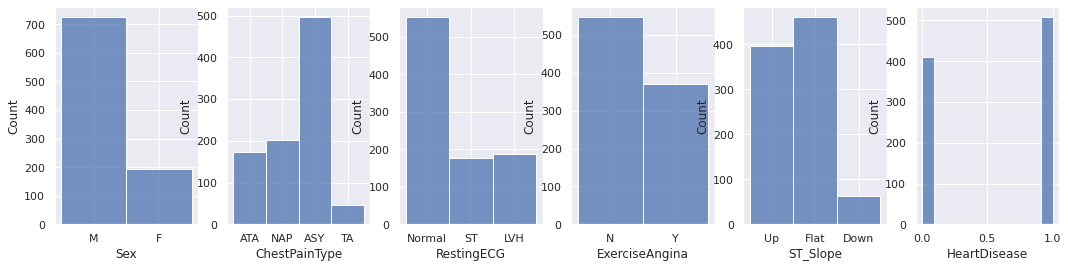

In [4]:
# Variables categóricas
fig, axs = plt.subplots(1, 6, figsize=(18, 4))

sns.histplot(data=df, x="Sex",            ax=axs[0])
sns.histplot(data=df, x="ChestPainType",  ax=axs[1])
sns.histplot(data=df, x="RestingECG",     ax=axs[2])
sns.histplot(data=df, x="ExerciseAngina", ax=axs[3])
sns.histplot(data=df, x="ST_Slope",       ax=axs[4])
sns.histplot(data=df, x="HeartDisease",   ax=axs[5])

plt.show()

Es importante destacar del anterior gráfico, que la variable a predecir *HeartDisease* está bastante balanceada.

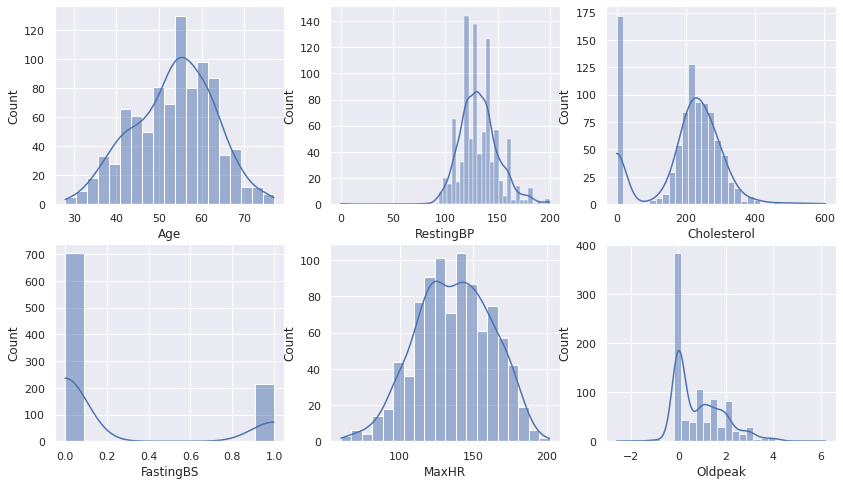

In [54]:
# Variables continuas
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

sns.histplot(data=df, x="Age",         kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="RestingBP",   kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="Cholesterol", kde=True, ax=axs[0, 2])
sns.histplot(data=df, x="FastingBS",   kde=True, ax=axs[1, 0])
sns.histplot(data=df, x="MaxHR",       kde=True, ax=axs[1, 1])
sns.histplot(data=df, x="Oldpeak",     kde=True, ax=axs[1, 2])

plt.show()

En el anterior gráfico podemos ver que hay casi 175 registros que tienen el colesterol a 0, lo cual indica que no hay lectura de datos para ese atributo, ya que no suele bajar de 170.

## 3. Classification models

Se evaluan diferentes modelos de clasificación a ver cual da mejores resultados. El único tratamiento que se va a realizar de momento es one-hot encoding en las variables categóricas.

In [18]:
# One-Hot encoding
# ------------------------------------------------------------------------------
df_ohe = pd.get_dummies(
    df,
    prefix_sep = '_',
    columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],
    drop_first = True
)

df_ohe.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


Se separa la muestra en conjunto de entrenamiento y de test.

In [21]:
# Columnas
list(df_ohe.columns)

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease',
 'Sex_M',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [25]:
# Data preparation
# ------------------------------------------------------------------------------
# X pandas DataFrame (multiple columns)
X = df_ohe.drop(columns=['HeartDisease'])

# y pandas Series (one column)
y = df_ohe['HeartDisease']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### 3.1. Regresión logística

In [40]:
# 1. Cargar las librerías scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# 2. Crear una instancia
clf_lr = LogisticRegression(max_iter=1000)

# 3. Calcular métricas
metrics = cross_validate(clf_lr, X, y, cv=5, scoring=('accuracy','f1'))

# 4. Mostrar métricas
print(f"Accuracy = {metrics['test_accuracy'].mean().round(4)}")
print(f"F1 score = {metrics['test_f1'].mean().round(4)}")

Accuracy = 0.8311
F1 score = 0.8453
